# ch03. Convolution Neural Network

- CNN 레이어 구성
  - Convolution Layer
  - Max pooling Layer
  - Flatten layer

```
Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu")
```

- 인자 1: convolution 필터의 수
- 인자 2: 커널의 shape
- padding: 경계처리
  - valid: 유효한 영역만 출력
  - same: 입출력 사이즈 동일
- input_shape : input 이미지
- activation
  - relu
  - linear
  - sigmoid
  - softmax

- image input format
  - channel_first
    - (샘플수, 채널수, 행, 열)
  - channel_last
    - (샘플수, 행, 열, 채널수)

In [12]:
!cat /root/.keras/keras.json

{
    "floatx": "float32",
    "epsilon": 1e-07,
    "backend": "tensorflow",
    "image_data_format": "channels_last"
}

- 하나의 필터가 입력 이미지를 순회
  - 파라미터 공유
  - 가중치의 갯수를 줄임
  - padding
    - valid: output이 줄어듬
    - same: output이 input이 동일
       - 경계명 학습 효과


### 연습

```
Conv2D(3, (2, 2), padding='samme', input_shape=(3, 3, 1))
```

- 필터: 3
- 필터 사이즈: (2, 2)
- input: 3x3
- input channel: 1
- output: 3x3
- output 채널: 3

![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_5.png)

----

```
Conv2D(1, (2, 2), padding='samme', input_shape=(3, 3, 3))
```

- 필터: 1
- 필터 사이즈: (2, 2)
- input: 3X3
- input channel: 3
- output: 3X3
- channel: 1 (채널별 합성곱은 합산)

![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_6.png)

![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_9.png)

----

```
Conv2D(2, (2, 2), padding='same', input_shape=(3, 3, 3))
```

- 필터: 2
- 필터 사이즈: (2, 2)
- input: 3X3
- input channel: 3
- output: 3X3
- channel: 2 

![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_10.png)

![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_11.png)

## reference

- https://tykimos.github.io/2017/01/27/CNN_Layer_Talk/

## CNN Design

![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_22.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_23.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_16.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_17.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_18.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_19.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_20.png)
----
![](http://tykimos.github.io/warehouse/2017-1-27_CNN_Layer_Talk_lego_23.png)

## CNN 코드 작성

In [5]:
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(2, (2, 2), padding='same', activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(3, (2, 2), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

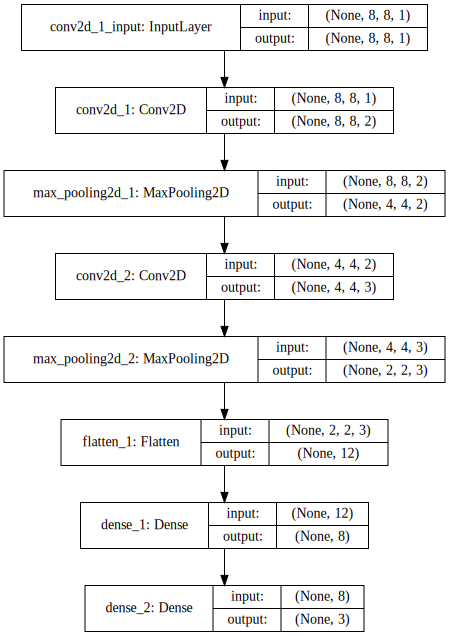

In [10]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))